<h1 align="center" style="background-color:DodgerBlue;">Desafío - Pruebas de hipótesis</h1>

>● Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
>
>● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
● Desarrollo desafío: Individual.
>
>● Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Pruebas de hipótesis.
>
### Habilidades a evaluar
>
>● Identificar la estandarización de variables mediante el cálculo de puntajes z.
>
>● Aplicar funciones a columnas de datos mediante ufuncs,
>
>● Conocer la distribución “t” de Student y su aplicación.
>
>● Aplicar pruebas de hipótesis simples en el contexto de la inferencia.
>
### Descripción
>
>A partir del trabajo realizado en el Desafío anterior, la empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, está vez, evaluando juicios de hipótesis e
>
>implementando funciones que faciliten el análisis de datos. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.
>
>A continuación revisaremos los requerimientos y acciones que la empresa a la cual postulas te pide realizar.
>
>1. Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.
>>● 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:
>>
>>● El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental.
>>
>>● Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
>>
>>● Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?
>
>2. Importar la base de datos utilizada la sesión presencial anterior (2 puntos):
>>
>>● Agregue una serie de variables binarias por cada continente de la variable region.
>>
>>Tip: Utilice np.where para ello.
>>
>>● De manera similar a la sesión anterior, enfóquese en las siguientes variables:
>>
>>● Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.
>>
>>● Apellidos desde la N hasta la Z: Enfocarse en las variables femlab, literacy y school.
>
>3. Implementar una función de prueba de hipótesis a mano (3 puntos):
>
>>● La función debe ingresar los siguientes argumentos:
>>
>>● df: La tabla de datos.
>>
>>● variable: La variable a analizar.
>>
>>● binarize: El indicador binario a utilizar.
>>
>>Tip:
>>
>>❖ Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna().
>>
>>❖ Implemente ttest_ind de scipy.stats y guarde el valor t y pval.
>>
>>❖ Reporte las medias para cada grupo (0 y 1).
>>
>>❖ Reporte la diferencia de entre las medias.
>>
>>❖ Reporte los valores t y p
>
>4. Implementar una función que grafique los histogramas para ambas muestras (3 puntos)
>
>>● Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente.
>>
>>Tip: Refactorize la función incluyendo el método hist de matplotlib.pyplot. Incluya los argumentos alpha y label.
>>
>>● Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.



In [10]:
#1. Importar librerías y .csv. (2 punto) para ello:
#● Importe las librerías básicas para el análisis de datos

%matplotlib inline
import pandas as pd
import numpy as np
import lec4_graphs as gfx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams['figure.figsize'] = (12, 8)

In [11]:
# Importar la base de datos utilizada la sesión presencial anterior (2 puntos):
df = pd.read_csv('datasets/nations.csv', encoding='latin-1')
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [12]:
df = pd.read_csv('datasets/nations.csv', encoding='latin-1', index_col=[0])
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [13]:
# Importar la base de datos utilizada la sesión presencial anterior (2 puntos):
# ● Agregue una serie de variables binarias por cada continente de la variable region.
# Tip: Utilice np.where para ello.

for i in df['region'].unique():
    df['is_'+str(i)] =np.where(df['region'] == i, 1, 0)
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,is_Africa,is_Americas,is_Asia,is_Europe,is_Oceania
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,1,0,0,0,0
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1,0,0,0,0
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1,0,0,0,0
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,1,0,0,0,0
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,1,0,0,0,0


In [15]:
# Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.
df_an = df.loc[:, ['region', 'adfert', 'chldmort', 'life']]

# Apellidos desde la N hasta la Z: Enfocarse en las variables femlab, literacy y school.
df_nz = df.loc[:, ['region', 'femlab', 'literacy', 'school']]

In [16]:
# Apellidos entre la A y la N
df_an.head()

,region,adfert,chldmort,life
1,Africa,7.300000,34.75,72.316666
2,Africa,111.699997,122.75,54.733334
3,Africa,52.099998,60.25,52.250000
4,Africa,124.800003,170.50,53.783333
5,Africa,18.600000,168.50,48.866665


In [17]:
# Apellidos entre la N y la Z
df_nz.head()

,region,femlab,literacy,school
1,Africa,0.4522,72.599998,6.716667
2,Africa,0.8482,41.700001,3.100000
3,Africa,0.8870,84.099998,8.600000
4,Africa,0.8584,23.600000,1.300000
5,Africa,1.0344,66.599998,2.483333


In [23]:
def hipotesis (df, var, binarize):
    
    tmp = df.copy()
    tmp = tmp.dropna(subset=[var])
    
    unos=tmp[tmp[binarize] ==1]
    ceros=tmp[tmp[binarize]==0]
    
    t, p = stats.ttest_ind(unos[var], ceros[var])
    
    print(f't_value: {t} - p_value: {p}')
    
    mediaunos=np.mean(unos[var])
    mediaceros=np.mean(ceros[var])
    
    print(f'La media de {var} del analizado es: {mediaunos} y la del resto es: {mediaceros}')
    print(f'La diferencia de las medias es:{mediaunos - mediaceros}')
    


In [31]:

hipotesis(df, 'life', 'is_Africa')
hipotesis(df, 'life', 'is_Americas')
hipotesis(df, 'life', 'is_Asia')
hipotesis(df, 'life', 'is_Europe')
hipotesis(df, 'life', 'is_Oceania')

t_value: -15.174602759471485 - p_value: 1.0713988391633837e-34
La media de life del analizado es: 56.490384542025055 y la del resto es: 73.21114999475614
La diferencia de las medias es:-16.720765452731086
t_value: 3.138414667252044 - p_value: 0.0019666060685098454
La media de life del analizado es: 73.45142800467355 y la del resto es: 67.68983217155409
La diferencia de las medias es:5.761595833119458
t_value: 1.7346722179790488 - p_value: 0.08440370105334277
La media de life del analizado es: 70.87244882388991 y la del resto es: 68.0050572625522
La diferencia de las medias es:2.867391561337712
t_value: 6.735355531733242 - p_value: 1.8491610377704238e-10
La media de life del analizado es: 76.94573619753815 y la del resto es: 66.38951416520882
La diferencia de las medias es:10.55622203232933
t_value: 0.342110739720379 - p_value: 0.732641741300036
La media de life del analizado es: 69.58444468180339 y la del resto es: 68.65763477772974
La diferencia de las medias es:0.9268099040736502


In [32]:
def hist_hipotesis(df, var, binarize):
    
    tmp=df.copy()
    tmp=tmp.dropna(subset=[var])
    
    plt.hist(tmp[tmp[binarize] ==1][var], alpha=0.4, label=binarize)
    plt.hist(tmp[tmp[binarize] ==0][var], label="not {}".format(binarize), alpha=0.4)

    plt.legend()
    plt.show()

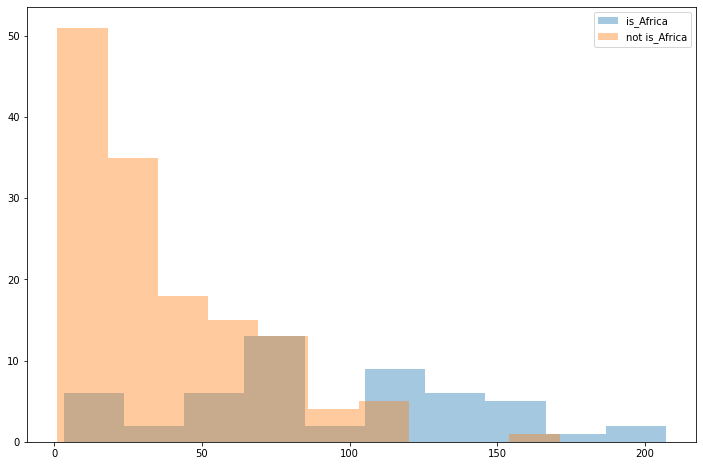

In [33]:
hist_hipotesis(df, "adfert", "is_Africa")

Africa
t_value: 9.444409431356496 - p_value: 1.2481674170069097e-17
La media de adfert del analizado es: 92.72115342892131 y la del resto es: 36.834507113611195
La diferencia de las medias es:55.88664631531012



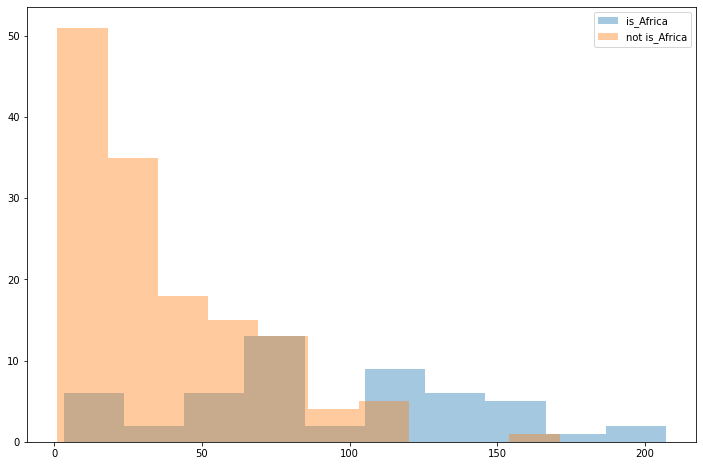

Africa
t_value: 14.17367667788517 - p_value: 1.244572684496239e-31
La media de chldmort del analizado es: 109.75 y la del resto es: 24.74822695035461
La diferencia de las medias es:85.0017730496454



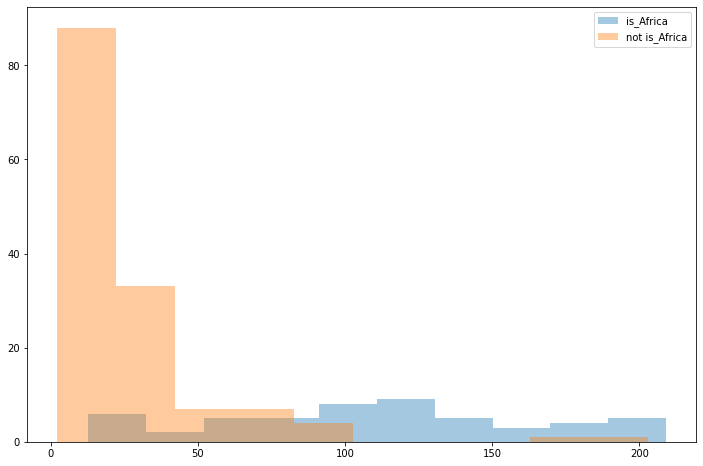

Africa
t_value: -15.174602759471485 - p_value: 1.0713988391633837e-34
La media de life del analizado es: 56.490384542025055 y la del resto es: 73.21114999475614
La diferencia de las medias es:-16.720765452731086



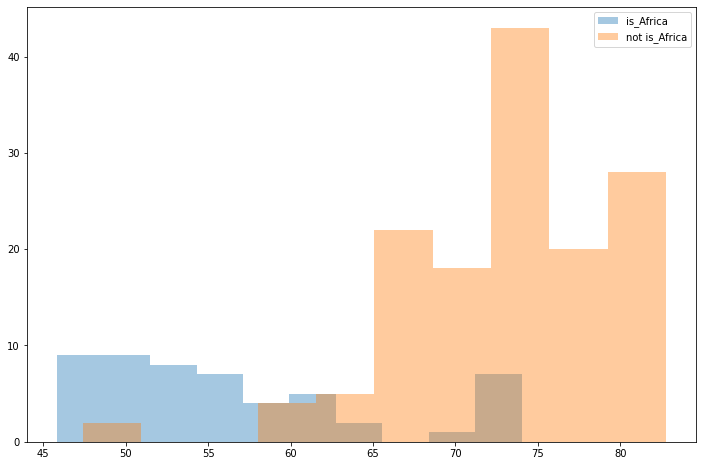

Americas
t_value: 1.7662790555775358 - p_value: 0.0789381617188923
La media de adfert del analizado es: 63.659999847412095 y la del resto es: 49.20691819985708
La diferencia de las medias es:14.453081647555017



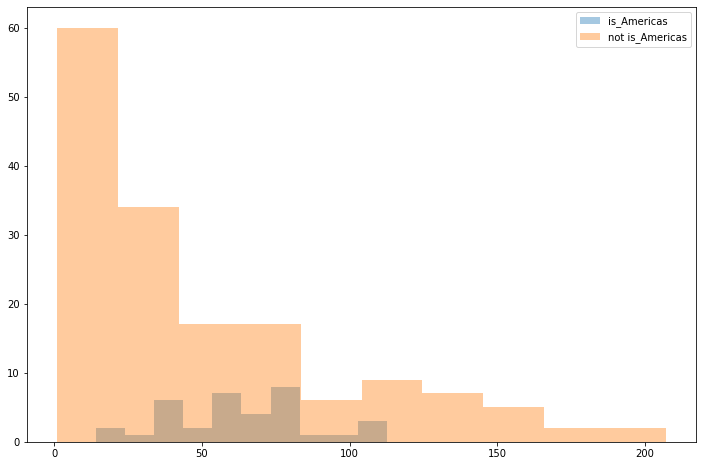

Americas
t_value: -3.08561941878294 - p_value: 0.00233300081092071
La media de chldmort del analizado es: 23.264285714285716 y la del resto es: 53.052215189873415
La diferencia de las medias es:-29.7879294755877



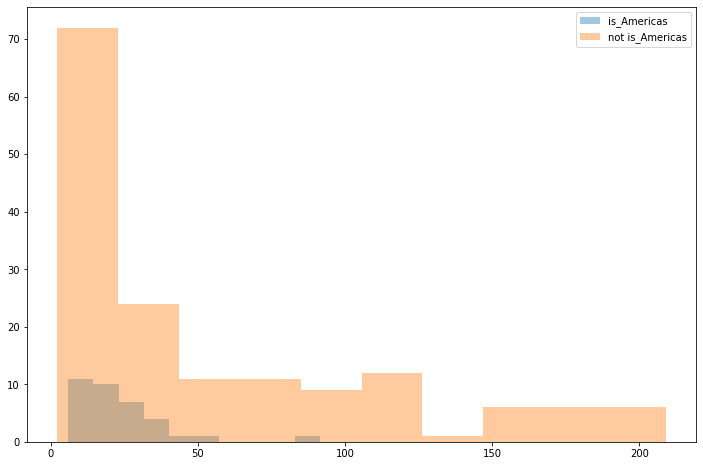

Americas
t_value: 3.138414667252044 - p_value: 0.0019666060685098454
La media de life del analizado es: 73.45142800467355 y la del resto es: 67.68983217155409
La diferencia de las medias es:5.761595833119458



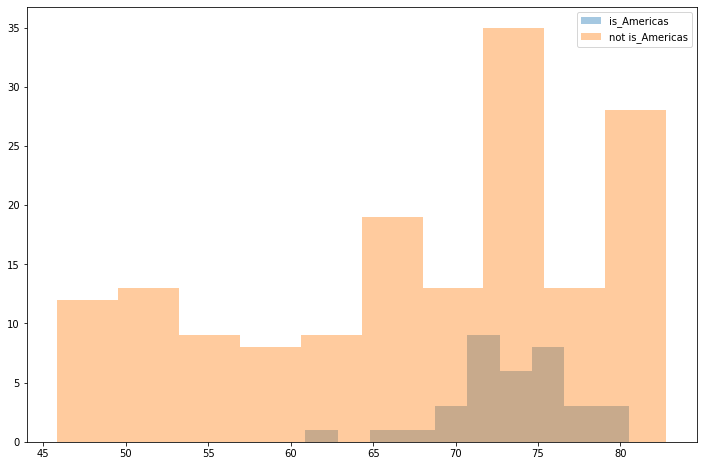

Asia
t_value: -3.386269877966909 - p_value: 0.0008592686089688165
La media de adfert del analizado es: 33.86530622170896 y la del resto es: 57.87999988671005
La diferencia de las medias es:-24.01469366500109



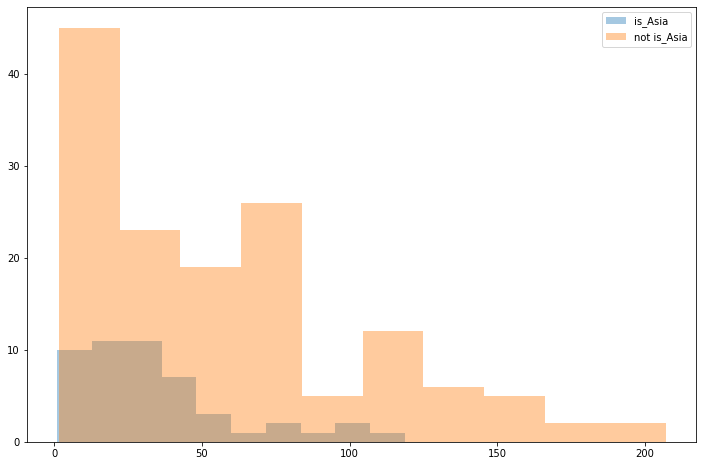

Asia
t_value: -1.602738386676471 - p_value: 0.1106448646711535
La media de chldmort del analizado es: 37.104166666666664 y la del resto es: 51.141379310344824
La diferencia de las medias es:-14.03721264367816



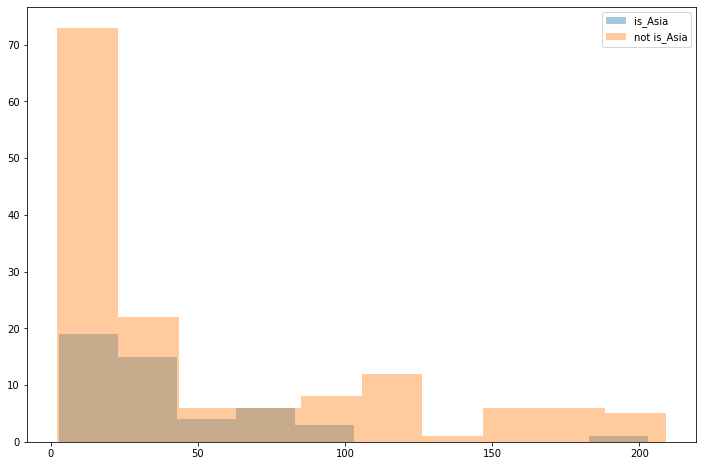

Asia
t_value: 1.7346722179790488 - p_value: 0.08440370105334277
La media de life del analizado es: 70.87244882388991 y la del resto es: 68.0050572625522
La diferencia de las medias es:2.867391561337712



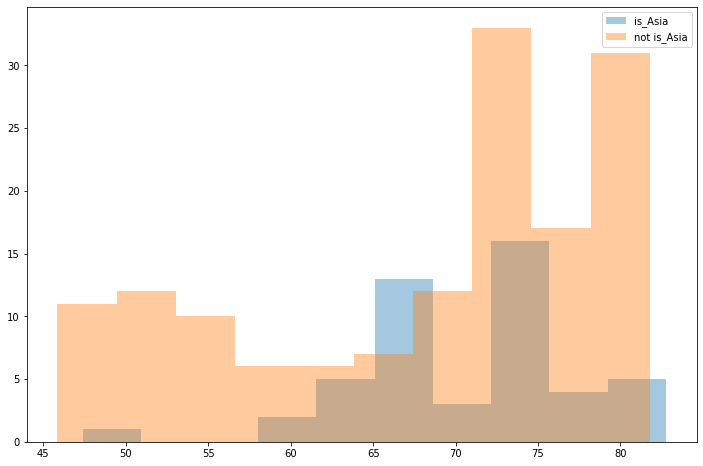

Europe
t_value: -6.797972597840039 - p_value: 1.3040875269879142e-10
La media de adfert del analizado es: 15.537209313969276 y la del resto es: 62.145033032688865
La diferencia de las medias es:-46.60782371871959



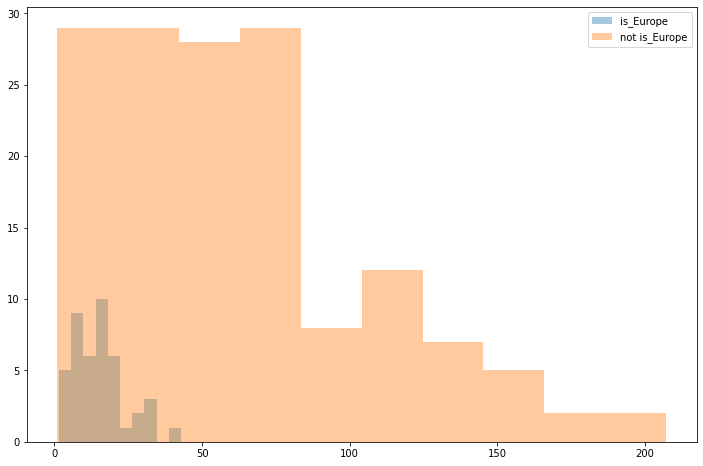

Europe
t_value: -6.262400472976766 - p_value: 2.4506589890929246e-09
La media de chldmort del analizado es: 7.046511627906977 y la del resto es: 59.29
La diferencia de las medias es:-52.243488372093026



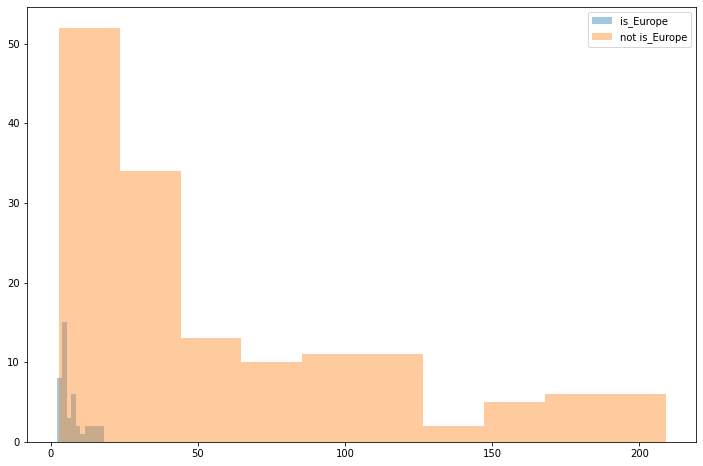

Europe
t_value: 6.735355531733242 - p_value: 1.8491610377704238e-10
La media de life del analizado es: 76.94573619753815 y la del resto es: 66.38951416520882
La diferencia de las medias es:10.55622203232933



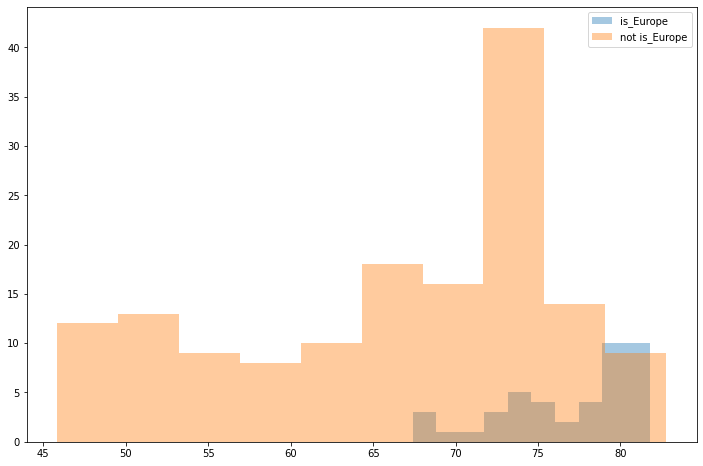

Oceania
t_value: -0.6231321887004004 - p_value: 0.5339371393742252
La media de adfert del analizado es: 44.99333400726322 y la del resto es: 52.386033398479036
La diferencia de las medias es:-7.392699391215814



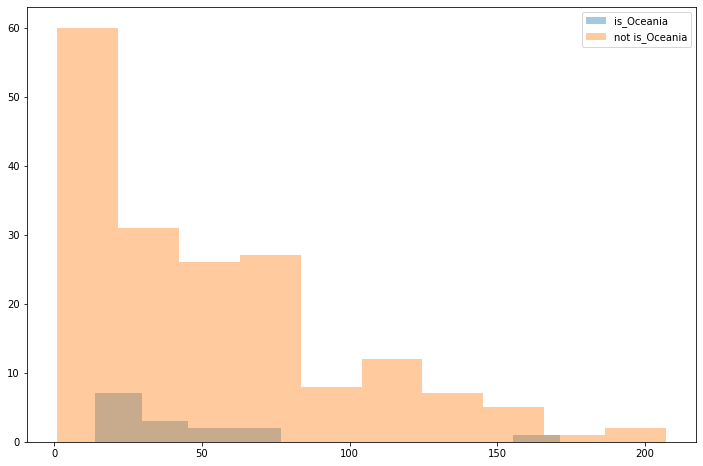

Oceania
t_value: -0.6277779742677246 - p_value: 0.5308992371716934
La media de chldmort del analizado es: 39.416666666666664 y la del resto es: 48.34410112359551
La diferencia de las medias es:-8.927434456928843



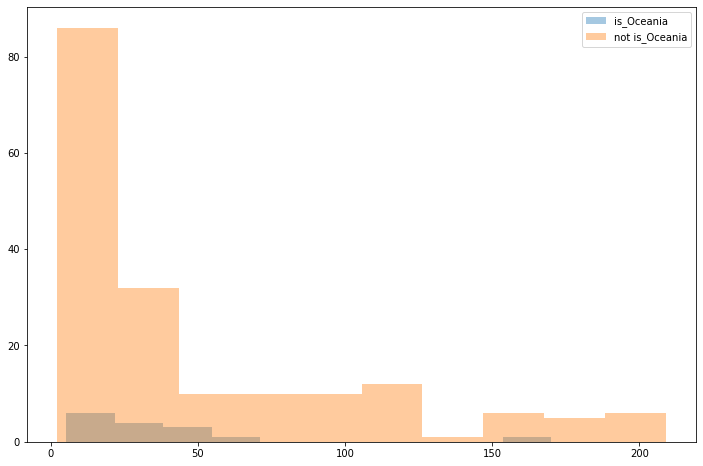

Oceania
t_value: 0.342110739720379 - p_value: 0.732641741300036
La media de life del analizado es: 69.58444468180339 y la del resto es: 68.65763477772974
La diferencia de las medias es:0.9268099040736502



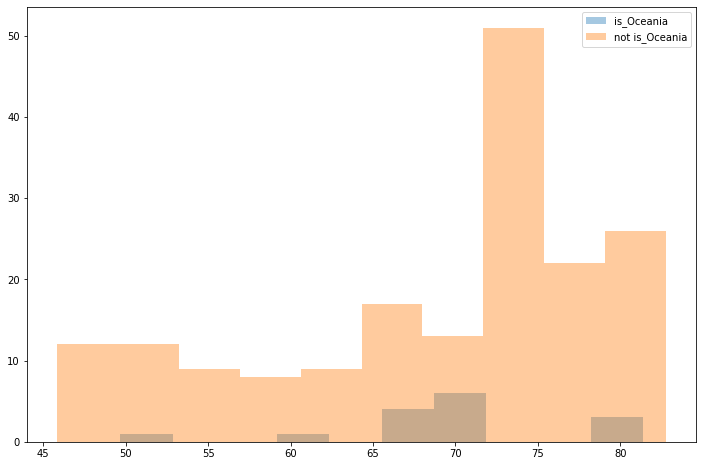

In [34]:
variables = ['adfert', 'chldmort', "life"]

for i in df['region'].unique():
    for j in variables:
        print(i)
        hipotesis(df, j, "is_{}".format(i))
        print()
        hist_hipotesis(df, j, "is_{}".format(i))